# Superstore Analysis

## Background

This simple dataset gives insights on online orders of a US superstore from 2015-2018.

## Data Description

There are total 21 variables in our dataset: 
- 'Row ID' - This is nothing but Serial No. 
- 'Order ID' - ID created when a product order is placed. 
- 'Order Date' - Date on which a customer places his/her order. 
- 'Ship Date' - Date on which the order is shipped. 
- 'Ship Mode' - Mode of shipment of each order. 
- 'Customer ID' - ID assigned to each customer who places an order. 
- 'Customer Name' - Name of Customer. 
- 'Segment' - Section from where the order is placed. 
- 'Country' - Country details of this data set. We are looking only for US store data. 
- 'City' - Cities of US are listed here. 
- 'State' - States of US are listed here. 
- 'Postal Code' - pin code
- 'Region' - grouped into region wise 
- 'Product ID' - Product ID of each product 
- 'Category' - Category to which each product belongs to. 
- 'Sub-Category' - Sub-Category of each Category 
- 'Product Name' - Name of products. 
- 'Sales' - total selling Price of each product order. 
- 'Quantity' - number of quantity available for a particular product order. 
- 'Discount' - Discount available on each product order. 
- 'Profit' - Profit gained on each product order.


## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

## Read the Data

In [2]:
df=pd.read_excel('Sample - Superstore.xlsx')
# The first five rows of data in a tabular format
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Transformation and Cleaning

- The result reveals a total of 9994 entries and 21 variables in the dataset.

In [3]:
# Row, column count of data
data = df.shape
pd.DataFrame(data, index = ["Records","Variables"],columns = ["Size"])

,Size
Records,9994
Variables,21


In [4]:
# Check data type of columns/attributes
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


- Generally, the columns tied with data type “int64” and “float64” denotes numerical data while data type “object” and "datetime64[ns]" denotes categorical data. 
- However, although "Postal Code" is represented as a number (float64), it is just numbers applied to categorical data. 

In [5]:
# Check if there are any missing values in the data
pd.DataFrame(df.isnull().sum(), columns = ["Missing values"])

,Missing values
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


- There are 11 missing values for the variable "Postal Code". 
- After looking at the data, we find that all the 11 missing postal codes belong to orders from city of Burlington and state of Vermont. All the orders from Burlington don't have a postal code. We think these records are missing because they are not recorded systematically. 
- It may affect the analysis if we drop the missing records, we need to impute the missing records with meaningful values. 
- After a deep study of the postal code in the United States, we decide to replace the missing postal code with 05408, one of the postal code of city Burlington. 
- We also convert the data type of Postal Code into 'int64' for better understanding.

In [6]:
df = df.fillna(5408)
df["Postal Code"]= df["Postal Code"].astype(int) 

In [7]:
# Details of data tyoes for each variable in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

- There is no missing value now. Also, we want to drop the columns that are not required for our analysis. We drop 'Row ID' column since it is nothing but the serial number.

In [8]:
# Dropping  Row ID column and assigning to df
df=df.drop('Row ID',axis=1)

## Descriptive Data Analysis

### Numerical Data

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


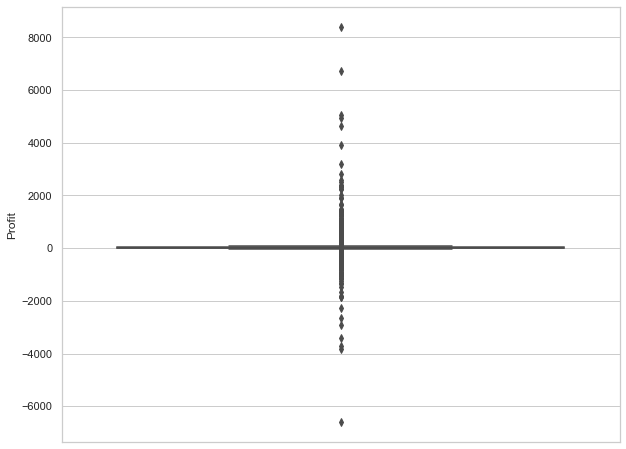

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ProfitPlot = sns.boxplot(x='Profit', data=df, orient="v")

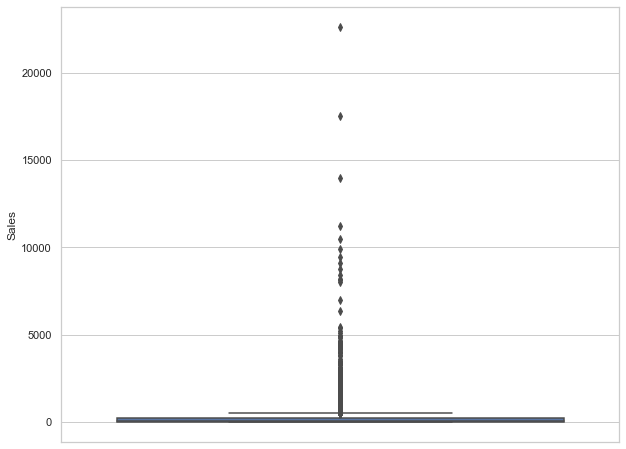

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
SalesPlot = sns.boxplot(x='Sales', data=df, orient="v")

- After checking the boxplots and the dataset, there is no significant outlier in variable Sales and Profit. 

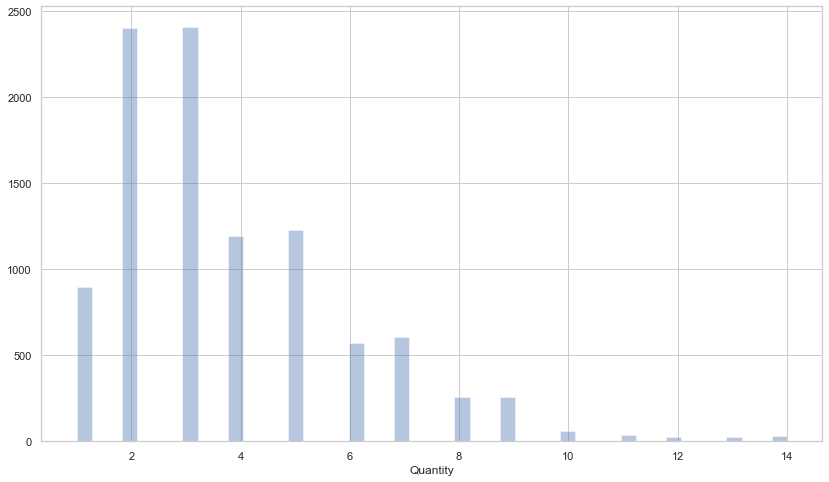

In [12]:
plt.figure(figsize=(14,8))
QuantityPlot = sns.distplot(df['Quantity'], kde=False)

- The frequency distribution of Quantity is positively skewed. Most customers order 2-5 individual products and only a few customers order more than 8 individual products at a time.

### Categorical Data

In [13]:
df.describe(include=['object'])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


- There is only one unique value in column 'Country'. The data is for US country only, so we don't need any analysis to be done based on it.

#### Category, Sub-Category and Product Name

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


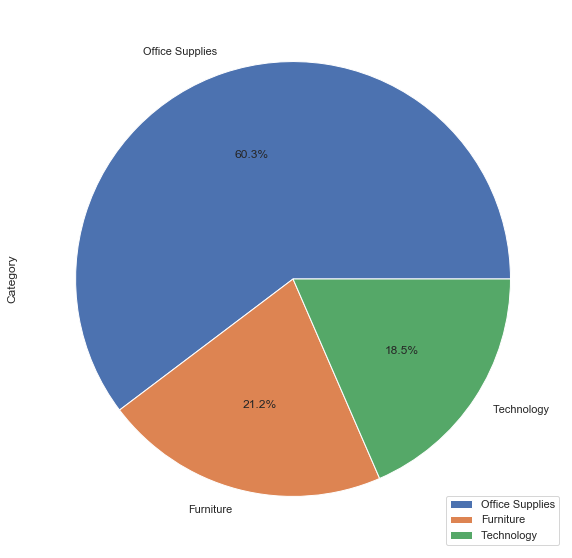

In [14]:
## Number of products in each category 
type_counts = df['Category'].value_counts()

print(type_counts)

df2 = pd.DataFrame({'Category': type_counts}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )
df2.plot.pie(y='Category', figsize=(10,10), autopct='%1.1f%%')

- 60.3% of products belong to Office Supplies.
- 21.2% of products belong to Furniture.
- Only 18.5% of products belong to Technology.




In [15]:
# Number of Sub-categories products are divided.
SubCategoryNum = df['Sub-Category'].nunique()
#number of products in each sub-category
sub_counts = df['Sub-Category'].value_counts()
print('There are', SubCategoryNum, 'Sub-categories products:')
print(sub_counts)

There are 17 Sub-categories products:
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


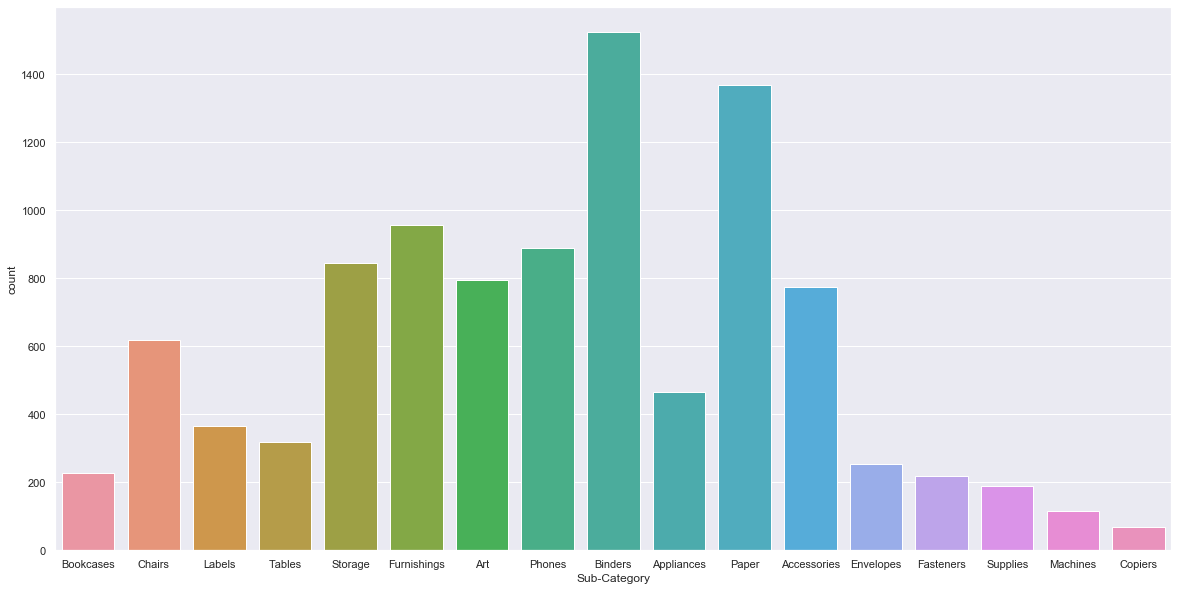

In [16]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Sub-Category', data=df)

- As shown in the graph, the store sells a wide variety of Office Supplies, especially in the Binders and Paper department.

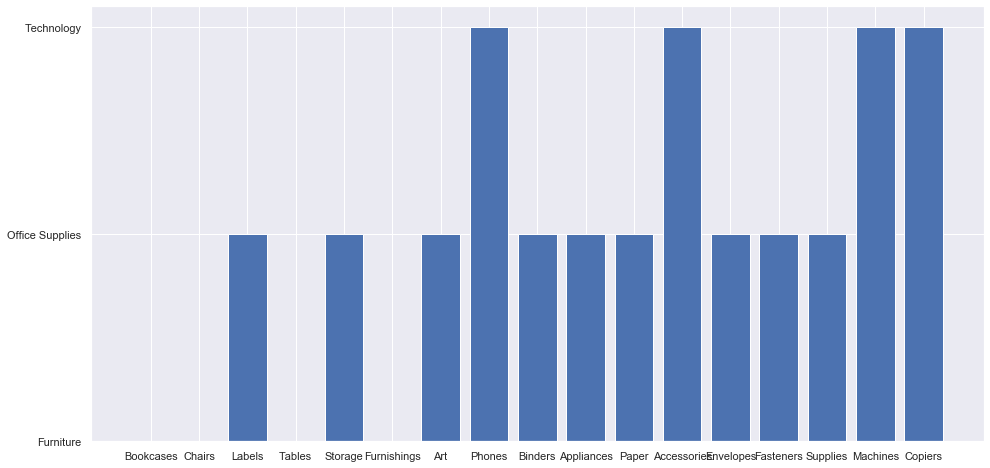

In [17]:
# How sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='b')
plt.show()

- The above graph shows how sub-categories are distributed into categories.


In [18]:
# Extracting the year of order
df['Order Year']=df['Order Date'].dt.year
df['Order Month']=df['Order Date'].dt.month

## Q1 : What is the most profitable customer ID each year?

In [19]:
# Split dataset by order year

df_2015 = df[df['Order Year']==2015]
df_2016 = df[df['Order Year']==2016]
df_2017 = df[df['Order Year']==2017]
df_2018 = df[df['Order Year']==2018]

# What is the most profitable customer ID each year?
customer_profit_2015 = pd.DataFrame(df_2015.groupby('Customer ID')['Profit'].sum())
best_customer_2015 = customer_profit_2015.sort_values(by=['Profit'],ascending=False).head(1)

customer_profit_2016 = pd.DataFrame(df_2016.groupby('Customer ID')['Profit'].sum())
best_customer_2016 = customer_profit_2016.sort_values(by=['Profit'],ascending=False).head(1)

customer_profit_2017 = pd.DataFrame(df_2017.groupby('Customer ID')['Profit'].sum())
best_customer_2017 = customer_profit_2017.sort_values(by=['Profit'],ascending=False).head(1)
customer_profit_2018 = pd.DataFrame(df_2018.groupby('Customer ID')['Profit'].sum())
best_customer_2018 = customer_profit_2018.sort_values(by=['Profit'],ascending=False).head(1)

d = {'Most Profitable Customer': [best_customer_2015.index[0], best_customer_2016.index[0], best_customer_2017.index[0],best_customer_2018.index[0]],
       'Profit': [best_customer_2015.iloc[0,0], best_customer_2016.iloc[0,0], best_customer_2017.iloc[0,0], best_customer_2018.iloc[0,0]]}
question_1 = pd.DataFrame(data=d, index=['2015','2016','2017','2018'])
question_1

,Most Profitable Customer,Profit
2015,SC-20095,5462.5830
2016,CM-12385,3197.4580
2017,TC-20980,8764.9483
2018,RB-19360,6780.8963


- The most profitable customer ID each year and his/her profit are shown in the above table.

## Q2 : Display the top 5 most profitable postal codes by region.

In [20]:
# Split dataset by region
df_central = df[df['Region']=='Central']
df_east = df[df['Region']== 'East']
df_south = df[df['Region'] == 'South']
df_west = df[df['Region'] == 'West']

# What is the top 5 most profitable postal codes by region?
postal_profit_central = pd.DataFrame(df_central.groupby('Postal Code')['Profit'].sum())
best_postal_central = postal_profit_central.sort_values(by=['Profit'],ascending=False).head(5)

postal_profit_east = pd.DataFrame(df_east.groupby('Postal Code')['Profit'].sum())
best_postal_east = postal_profit_east.sort_values(by=['Profit'],ascending=False).head(5)

postal_profit_south = pd.DataFrame(df_south.groupby('Postal Code')['Profit'].sum())
best_postal_south = postal_profit_south.sort_values(by=['Profit'],ascending=False).head(5)

postal_profit_west = pd.DataFrame(df_west.groupby('Postal Code')['Profit'].sum())
best_postal_west = postal_profit_west.sort_values(by=['Profit'],ascending=False).head(5)

frame = {'Central':best_postal_central,'East': best_postal_east, 'South': best_postal_south, 'West': best_postal_west}
question_2 = pd.concat(frame)
question_2

Profit
        Postal Code            
Central 47905         8976.0973
        48205         7994.5263
        55407         6824.5846
        49201         5525.1992
        65807         3905.5891
East    10024        21653.7248
        10035        16533.8669
        10009        13697.0019
        10011        10152.3901
        19711         8086.1715
South   30318         6993.6629
        22153         4568.5789
        42420         4518.8169
        22204         4424.0855
        31907         4104.1219
West    98115        13303.8755
        98105         8734.6042
        90049         7793.1145
        94122         7712.5958
        98103         7117.6170

- The top five most profitable postal codes by region are shown in the table above. The result does not include the Postal Code value we imputed before.

## Q3 : Which state has the highest percentage of their sales coming from chairs?

In [21]:
# Which state has the highest percentage of their sales coming from chairs?
state_total_sales = pd.DataFrame(df.groupby('State')['Sales'].sum())
state_chair_sales = pd.DataFrame(df[df['Sub-Category']=='Chairs'].groupby('State')['Sales'].sum())
state_percentage_chair_sales = state_chair_sales/state_total_sales*100
question_3 = pd.DataFrame(
    state_percentage_chair_sales.sort_values(by=['Sales'],ascending=False).head(1))
question_3 = question_3.rename(columns={"Sales": "% Sales of Chairs"})
question_3

,% Sales of Chairs
State,
Wyoming,100.0


- The State of Wyoming has the highest percentage of their sales coming from chairs, which is 100%. 

## Q4 : Shown in graphical form, what percentage of each Region's sales come from each of the product categories (Furniture, Office Supplies, Technology)?

#### Central Region
- 33.3% of products belong to Office Supplies.
- 32.7% of products belong to Furniture.
- 34% of products belong to Technology.
- The product categories here are evenly distributed. 

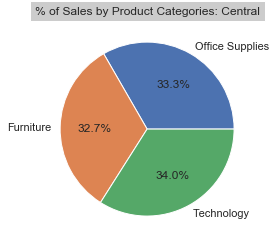

In [22]:
#number of products in each category 
central_category_sales = pd.DataFrame(df_central.groupby('Category')['Sales'].sum())['Sales']

plt_central = pd.DataFrame({'Sales by Category': central_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_central,  labels = plt_central.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: Central", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


#### East Region
- 30.3% of products belong to Office Supplies.
- 30.7% of products belong to Furniture.
- 39% of products belong to Technology.
- The proportion of Technology products in the East Region is higher than in the other two categories.  

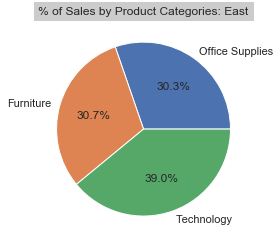

In [23]:
east_category_sales = pd.DataFrame(df_east.groupby('Category')['Sales'].sum())['Sales']

plt_east = pd.DataFrame({'Sales by Category': east_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_east,  labels = plt_east.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: East", bbox={'facecolor':'0.8', 'pad':5})
plt.show()



#### West Region
- 30.4% of products belong to Office Supplies.
- 34.8% of products belong to Furniture.
- 34.7% of products belong to Technology.

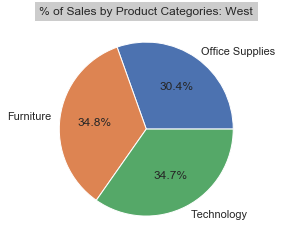

In [24]:
west_category_sales = pd.DataFrame(df_west.groupby('Category')['Sales'].sum())['Sales']

plt_west = pd.DataFrame({'Sales by Category': west_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_west,  labels = plt_west.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: West", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

#### South Region
- 32.1% of products belong to Office Supplies.
- 29.9% of products belong to Furniture.
- 38% of products belong to Technology.
- The proportion of Technology products in the South Region is higher than in the other two categories.  

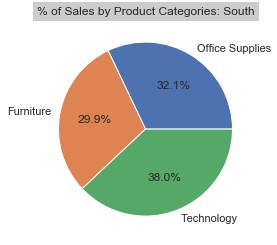

In [25]:
south_category_sales = pd.DataFrame(df_south.groupby('Category')['Sales'].sum())['Sales']

plt_south = pd.DataFrame({'Sales by Category': south_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_south,  labels = plt_south.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: South", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## Q6 : Forecasting

### a. Create a graphical display of sales by month, separated by each year.

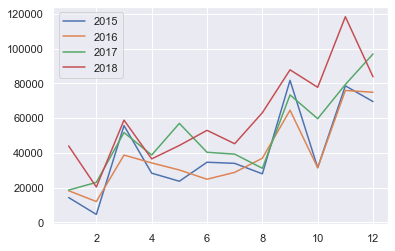

In [26]:
month_sales_2015 = pd.DataFrame(df_2015.groupby('Order Month')['Sales'].sum())
month_sales_2016 = pd.DataFrame(df_2016.groupby('Order Month')['Sales'].sum())
month_sales_2017 = pd.DataFrame(df_2017.groupby('Order Month')['Sales'].sum())
month_sales_2018 = pd.DataFrame(df_2018.groupby('Order Month')['Sales'].sum())


plt.plot(month_sales_2015['Sales'],label ='2015')
plt.plot(month_sales_2016['Sales'],label ='2016')
plt.plot(month_sales_2017['Sales'],label ='2017')
plt.plot(month_sales_2018['Sales'],label ='2018')
plt.legend()



- The graph is shown above. It shows an increasing trend of sales within each year and an increasing trend in sales from 2015 to 2018.

### b1. Forecasting Method 1: ARIMA Model

ARIMA Model is a prediction model used for time series analysis and forecasting. It represents
- Auto Regressive: lags of variables itself
- Integrated: differencing steps required to make stationary
- Moving Average: lags of previous information shocks

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

Pros:
- Better understand the time-series patterns.
- Its forecasts are usually more accurate and reliable.

Cons:
- The data series used by ARIMA have to be stationary or be made stationary by differencing.
- It only works on a single variable (a univariate model). Therefore it cannot exploit the leading indicators or explanatory variables.
- It captures only linear relationships.

According to the graph above, our dataset could use the ARIMA model since it looks like there is a linear relationship between sales and years. However, we need to exclude the trend and seasonal effects to get a stationary dataset.

We could forecast the year for 2019 by each category or sub-category. Below, we take the furniture sales as an example.

#### Step1 : Stationarity

- We will use the averages daily sales value to represent that month, and we are using the start of each month as the timestamp.

In [28]:
y = furniture['Sales'].resample('MS').mean()
pd.DataFrame(y['2018':])

,Sales
Order Date,
2018-01-01,397.602133
2018-02-01,528.179800
2018-03-01,544.672240
2018-04-01,453.297905
2018-05-01,678.302328
2018-06-01,826.460291
2018-07-01,562.524857
2018-08-01,857.881889
2018-09-01,1209.508583


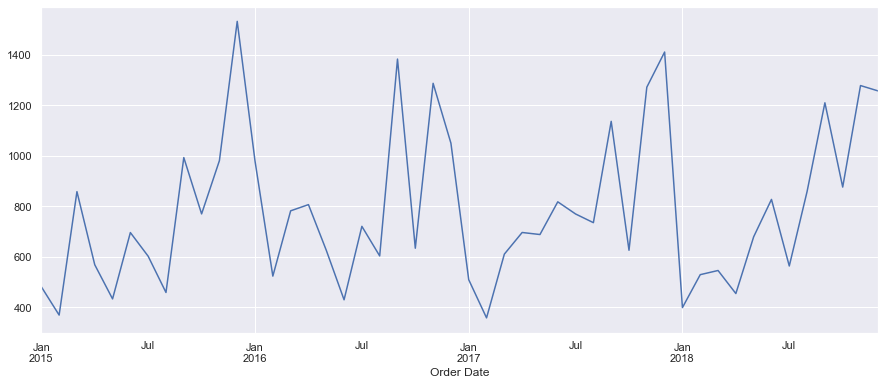

In [29]:
y.plot(figsize=(15, 6))
plt.show()

- The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year. 
- Therefore, the dataset is unstationary.

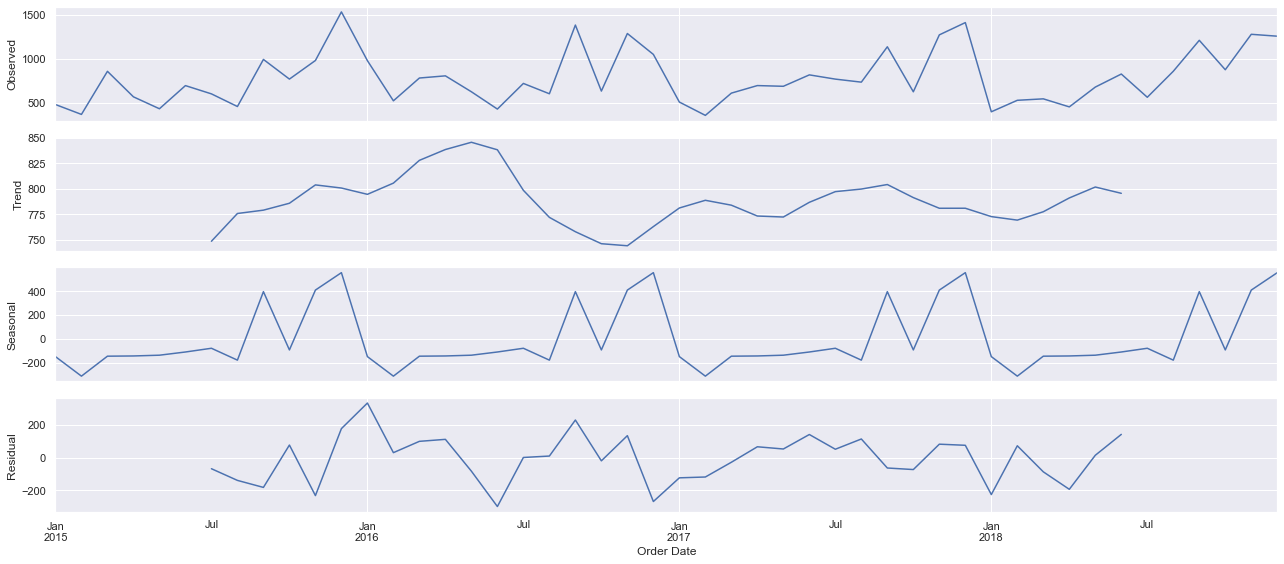

In [30]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

- The decomposition of the time series is shown above.

#### Step2 : Parameter Selection 

In [31]:
# Parameter Selection 
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x 
                in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1576.73092538134
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1478.127724912537
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758109
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2786.7230874852653
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091505
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.6005804848146
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2768.427220528199
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946866
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1378.5486307085782
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671879367
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1023.1791464719739
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIM

- The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

#### Step3 : Fitting the ARIMA model

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


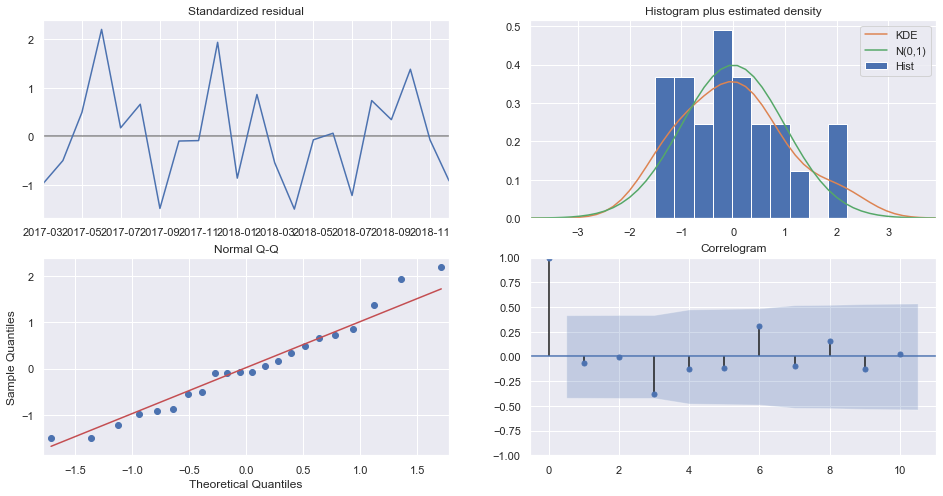

In [32]:
### Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

- Our model diagnostics suggests that the model residuals are near normally distributed.

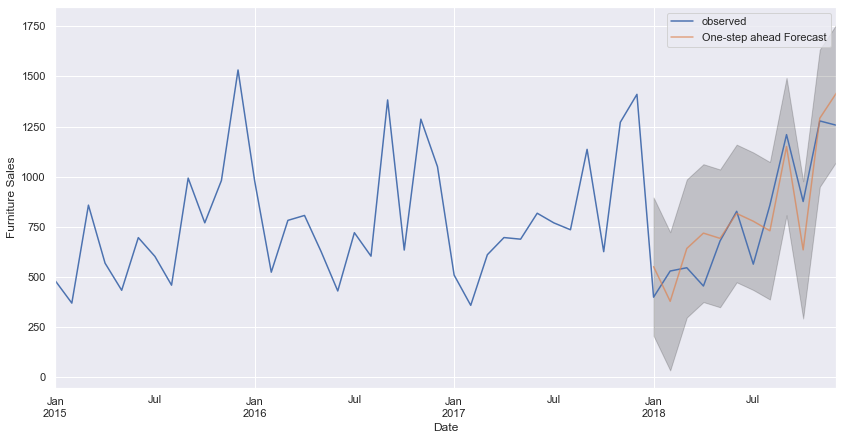

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

- The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

#### Reference: 
A Guide to Time Series Forecasting with ARIMA in Python 3 https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

### b2. Forecasting Method 2: Multiple Linear Model

We use a linear regression to predict continuous values. Multiple regression is used to examine the relationship between several independent variables and a dependent variable.

Pros: 
- It uses external factors (independent) as an explanatory variable for the dependent value.
- It can determine the relative influence of one or more predictor variables to the criterion value. 
- It can identify outliers, or anomalies easily when using the multiple linear regression model.

Cons:
- There may be complex data sets that lead to false conclusions if they are not analyzed properly.
- Its performance highly relies on the quality of the data set used. 

Our data set can use a rolling multiple linear regression model to predict the sales of year 2019. We could include number of orders, number of new customers, discount, region dummy variables and segment dummy variables in the regression. We also need to split the dataset into the Training and Test dataset.

When we use multiple regression model, there are many regression algorithms we could try, for example:
- Ordinal regression
- Decision forest regression
- Neural network regression
- KNN (K-nearest neighbors)

### b3. Forecasting Method 3: Prophet

The Facebook Prophet model is a combination of multiple functions such as trend, multiple seasonalities, and holidays. It is therefore conceptually similar to a Generalized Additive Model. It is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily.

Pros:
- Ability to easily model any number of seasonalities
- Ability to work with missing dates in time-series
- Easily integrates holidays in the model

Cons:
- Can be volatile with a low number of observations
- Long-horizon forecasting can be volatile with automatic changepoint selection

Although it is a new time series analysis tool that can work with missing dates and seasonal effects, it may not be suitable for our dataset since the number of observations in our dataset is low.



#### Reference: 
A Guide to Time Series Forecasting with Prophet in Python 3 https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

Prophet vs DeepAR: Forecasting Food Demand https://towardsdatascience.com/prophet-vs-deepar-forecasting-food-demand-2fdebfb8d282

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

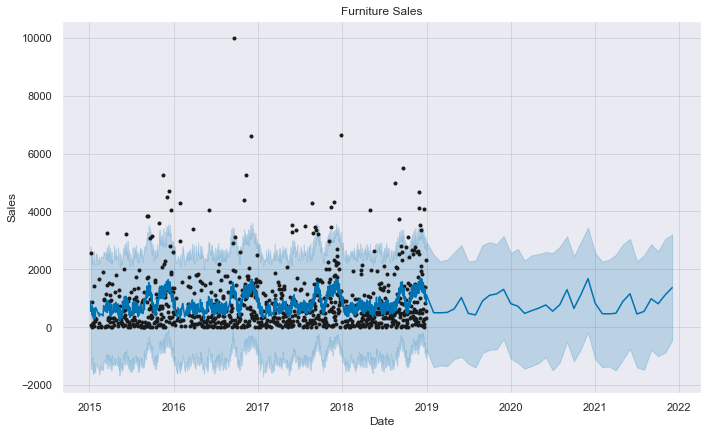

In [34]:
from fbprophet import Prophet
furniture['ds'] = furniture.index
furniture = furniture.rename(columns={'Sales': 'y',
                        'ds': 'ds'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

## Question 5, 7, 8, 9 will be answered in Tableau.
## Normalization of Database

Normalization of relational database helps us avoid redundancy and anomaly. It helps us insert, update, and delete records easily, and it performs better than excel files when we want to share the dataset among a group or understand the relationship between variables quickly. 

I tried to design a database in SQL Server that satisfies the Third Normal Form. The ER diagram of the database is shown below. It satisfies the following conditions:
- All non-key attributes are fully functional dependent on the primary key
- There is no transitive functional dependency
- Contains only atomic values
- There are no repeating groups

### ER Diagram

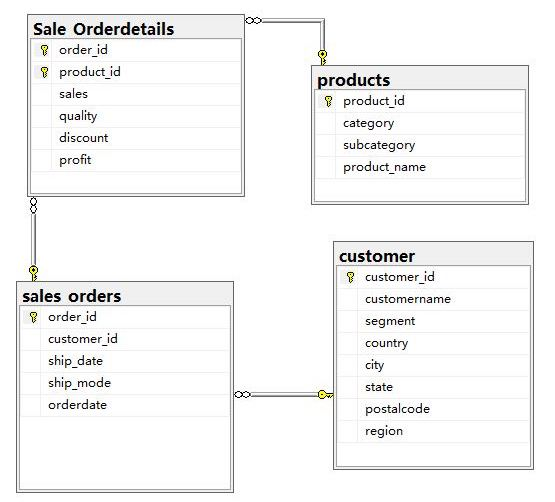

In [35]:
from IPython.display import Image
Image(filename='relation_diagram.png')

## Appendix

### RFM Analysis

| Customer Classification | Recency (R) | Frequency (F) | Monetary(M)| Description|
|--------------------|----------|------------|----------|----------|
|   Best Customers  | 1|1  |  1|Customers with high recency, frequency and monetary|
|   Important recall Customers  | 0|1|1|Customers with high frequency and monetary, but do not order recently|
|   Important Developing Customers  | 1|0|1|New customers but have spent a lot money|
|   Big Spenders  | 0|0|1|Customers spend a lot money on a few orders|
|   Loyal Customers  | 1|1|0| Regular customers that do not spend a lot of money here|
|   Recent Customers  | 1|0|0| New customers|
|   Almost Customers  | 0|1|0| Customers that used to place a lot of orders, but do not order recently.|
|   Lost Customers  | 0|0|0|Low recency, frequency and monetary|


- Recency: how recently a customer has purchased, calculated by the days between last order date and current date.
- Frequency: how often they purchase, calculated by the total number of orders.
- Monetary: how much the customer spends, calculated by the total amount of sales.

### SQL Code

``` sql
USE New_table;

CREATE TABLE customer
 (
  customer_id            INT          NOT NULL IDENTITY,
  customername           NVARCHAR(50),
  segment                NVARCHAR(50) ,
  country                NVARCHAR(50) ,
  city                   NVARCHAR(50) ,
  state                  NVARCHAR(50) ,
  postalcode             NVARCHAR(50) ,
  region                 NVARCHAR(50) ,
 
 CONSTRAINT pk_customer PRIMARY KEY(customer_id)
 );

 CREATE TABLE products
(
 product_id                    INT           NOT NULL IDENTITY,
 category        NVARCHAR(40) ,
 subcategory     NVARCHAR(40) ,
 product_name    NVARCHAR(40) ,
 
 CONSTRAINT pk_product PRIMARY KEY(product_id)
 );


  CREATE TABLE sales_orders
 (
  order_id            INT     NOT NULL IDENTITY,
  customer_id     INT     ,
  ship_date       NVARCHAR(40) ,
  ship_mode       NVARCHAR(40) ,
  orderdate       NVARCHAR(40) , 

  CONSTRAINT pk_sales_orders PRIMARY KEY(order_id)
 );


 CREATE TABLE Sale_Orderdetails
 (
  order_id               INT    NOT NULL,
  product_id             INT    NOT NULL,
  sales                  INT    ,
  quality                INT    ,
  discount               INT    ,
  profit                 INT    ,     

  CONSTRAINT pk_orderproduct PRIMARY KEY(product_id,order_id)
 );


 
  ALTER TABLE dbo.sales_orders
    ADD CONSTRAINT FK_customer_id FOREIGN KEY (customer_id)
	REFERENCES dbo.customer (customer_id)
	ON DELETE CASCADE
	ON UPDATE CASCADE
;


  ALTER TABLE dbo.sale_orderdetails
    ADD CONSTRAINT FK_product FOREIGN KEY (product_id)
	REFERENCES dbo.products (product_id)
	ON DELETE CASCADE
	ON UPDATE CASCADE
;

  ALTER TABLE dbo.sale_orderdetails
    ADD CONSTRAINT FK_order FOREIGN KEY (order_id)
	REFERENCES dbo.sales_orders (order_id)
	ON DELETE CASCADE
	ON UPDATE CASCADE
;
```